In [1]:
pip install msprime

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install pandas

  Using cached pandas-2.2.3-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (89 kB)
  Using cached pytz-2024.2-py2.py3-none-any.whl.metadata (22 kB)
Using cached pandas-2.2.3-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.7 MB)
Using cached pytz-2024.2-py2.py3-none-any.whl (508 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.6/346.6 kB 2.2 MB/s eta 0:00:002.0 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install tskit_arg_visualizer

Note: you may need to restart the kernel to use updated packages.


In [15]:
import msprime
import numpy as np
from IPython.display import SVG, display

## Тыкаемся (черновики, скрыть)

In [91]:
parameters = {
    "samples": 3, # Three diploid individuals == six sample genomes
    "sequence_length": 1e4,
    "recombination_rate": 1e-7,
    "population_size": 1e3,
    "random_seed": 333,
}

ts_arg = msprime.sim_ancestry(
    **parameters,
    discrete_genome=False,  # the strict Hudson ARG needs unique crossover positions (i.e. a continuous genome)
    coalescing_segments_only=False,   # setting record_full_arg=True is equivalent to these last 2 parameters
    additional_nodes=msprime.NodeType.COMMON_ANCESTOR | msprime.NodeType.RECOMBINANT,
)

print('Simulated a "full ARG" under the Hudson model:')
print(
    f" ARG stored in a tree sequence with {ts_arg.num_nodes} nodes and"
    f" {ts_arg.num_edges} edges (creating {ts_arg.num_trees} local trees)"
)

Simulated a "full ARG" under the Hudson model:
 ARG stored in a tree sequence with 17 nodes and 18 edges (creating 3 local trees)


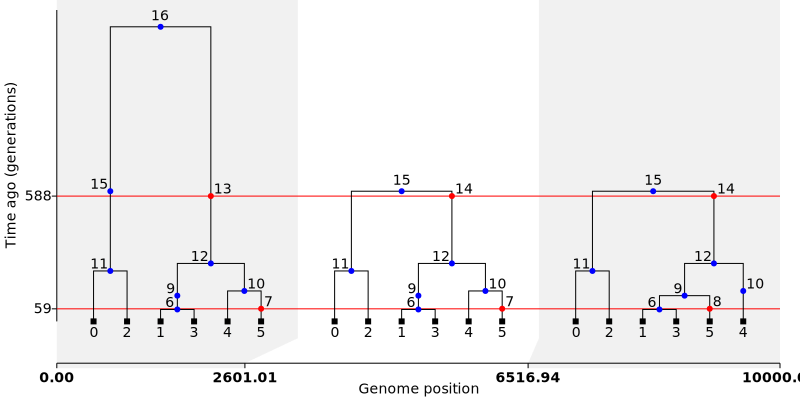

In [92]:
# Plot the recombination nodes in red, with a horizontal line at the time of occurrence,
# and only label nodes that are samples or recombination nodes.
samples = set(ts_arg.samples())
re_nodes = set(nd.id for nd in ts_arg.nodes() if nd.flags & msprime.NODE_IS_RE_EVENT)
ca_nodes = set(np.arange(ts_arg.num_nodes)) - re_nodes - samples
re_times = [int(nd.time) for nd in ts_arg.nodes() if nd.flags & msprime.NODE_IS_RE_EVENT]
style = ".y-axis .grid {stroke: #ff000033} .mut .sym {stroke: goldenrod}"
for u in re_nodes:
    style += f".n{u} > .sym {{fill: red}}"
for u in ca_nodes:
    style += f".n{u} > .sym {{fill: blue}}"
ts_arg.draw_svg(
    size=(800, 400),
    y_axis=True,
    y_ticks=re_times,
    y_gridlines=True,
    style=style,
    mutation_labels={},
    node_labels={u: u for u in samples | re_nodes | ca_nodes }
)

In [68]:
for tree in ts_arg.trees():
    print(tree)
    print(tree.interval)
    print(tree.rank())

╔════════════════════════════════════════════╗
║Tree                                        ║
╠═══════════════════╤════════════════════════╣
║Index              │                       0║
╟───────────────────┼────────────────────────╢
║Interval           │0-2,953.3681(2,953.3681)║
╟───────────────────┼────────────────────────╢
║Roots              │                       1║
╟───────────────────┼────────────────────────╢
║Nodes              │                      16║
╟───────────────────┼────────────────────────╢
║Sites              │                       0║
╟───────────────────┼────────────────────────╢
║Mutations          │                       0║
╟───────────────────┼────────────────────────╢
║Total Branch Length│              5,881.3678║
╚═══════════════════╧════════════════════════╝

Interval(left=0.0, right=2953.368141315878)


ValueError: Cannot rank trees with unary nodes

In [40]:
ts

In [47]:
print(ts.tables_dict)

{'edges': <tskit.tables.EdgeTable object at 0x71f58a253890>, 'individuals': <tskit.tables.IndividualTable object at 0x71f58a253ad0>, 'migrations': <tskit.tables.MigrationTable object at 0x71f58a250f20>, 'mutations': <tskit.tables.MutationTable object at 0x71f58a252ed0>, 'nodes': <tskit.tables.NodeTable object at 0x71f58a2517f0>, 'populations': <tskit.tables.PopulationTable object at 0x71f58a250410>, 'provenances': <tskit.tables.ProvenanceTable object at 0x71f58a251370>, 'sites': <tskit.tables.SiteTable object at 0x71f58a2527e0>}


In [48]:
print(ts.table_metadata_schemas)

TableMetadataSchemas(node=, edge=, site=, mutation=, migration=, individual=, population={"additionalProperties":true,"codec":"json","properties":{"description":{"type":["string","null"]},"name":{"type":"string"}},"required":["name","description"],"type":"object"})


In [54]:
print(ts.tables.individuals)
print(ts.tables.nodes)
print(ts.tables.edges)
print(ts.tables.migrations)
print(ts.tables.populations)
print(ts.tables.provenances)
print(ts.tables.sites)

╔══╤═════╤════════╤═══════╤════════╗
║id│flags│location│parents│metadata║
╠══╪═════╪════════╪═══════╪════════╣
║0 │    0│        │       │        ║
║1 │    0│        │       │        ║
║2 │    0│        │       │        ║
╚══╧═════╧════════╧═══════╧════════╝

╔══╤═════╤══════════╤══════════╤══════════╤════════╗
║id│flags│population│individual│time      │metadata║
╠══╪═════╪══════════╪══════════╪══════════╪════════╣
║0 │    1│         0│         0│0.00000000│        ║
║1 │    1│         0│         0│0.00000000│        ║
║2 │    1│         0│         1│0.00000000│        ║
║3 │    1│         0│         1│0.00000000│        ║
║4 │    1│         0│         2│0.00000000│        ║
║5 │    1│         0│         2│0.00000000│        ║
║6 │    0│         0│        -1│0.02728905│        ║
║7 │    0│         0│        -1│0.36592323│        ║
║8 │    0│         0│        -1│0.41171749│        ║
║9 │    0│         0│        -1│0.71802167│        ║
║10│    0│         0│        -1│0.86215746│        

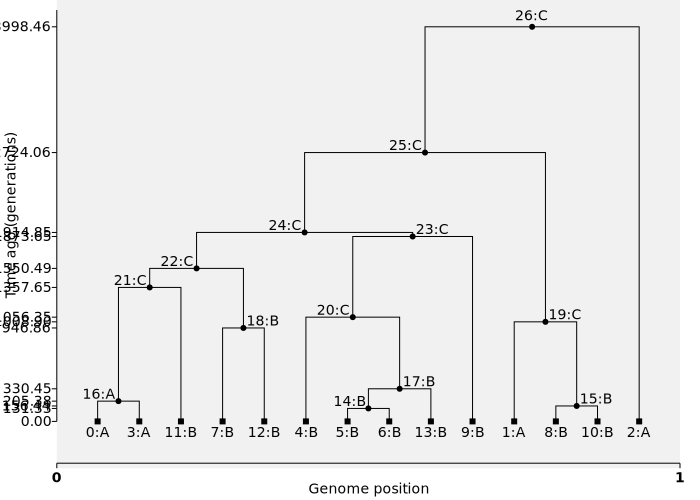

In [107]:
demography = msprime.Demography()
demography.add_population(name="A", initial_size=10_000)
demography.add_population(name="B", initial_size=5_000)
demography.add_population(name="C", initial_size=1_000)
demography.add_population_split(time=1000, derived=["A", "B"], ancestral="C")

ts = msprime.sim_ancestry(samples={"A": 2, "B": 5}, demography=demography, random_seed=12)
# for node in ts.nodes():
#     print(node)
ts.draw_svg(size=(700, 500), y_axis=True, node_labels={node.id: f"{node.id}:{ts.population(node.population).metadata['name']}"
    for node in ts.nodes()})

In [190]:
demography = msprime.Demography()
demography.add_population(name="A", initial_size=100)
demography.add_population(name="B", initial_size=100)
demography.add_population(name="ADMIX", initial_size=100)
demography.add_population(name="ANC", initial_size=100)
demography.add_admixture(
    time=10, derived="ADMIX", ancestral=["A", "B"], proportions=[0.25, 0.75])
demography.add_population_split(time=20, derived=["A", "B"], ancestral="ANC")
demography.debug()

In [ ]:
samples_p1 = set(node.id for node in ts.nodes() if (node.population==0) & (node.flags==1))
samples_p2 = set(node.id for node in ts.nodes() if (node.population==1) & (node.flags==1))
samples_p3 = set(node.id for node in ts.nodes() if (node.population==3) & (node.flags==1))
samples_p1, samples_p2, samples_p3

In [498]:
for p1_sample in samples_p1:
    print(p1_sample, [( edge.parent, edge.span) for edge in ts.edges() if edge.child == p1_sample ])
for node in ts.nodes():
    print(f"id: {node.id}, is_sample: {node.flags}, time: {node.time}, population_id: {node.population}")
for edge in ts.edges():
    print(f"{edge.interval}, id: {edge.id}, {edge.parent} -> {edge.child}")

0 [(23, 10.0)]
1 [(24, 10.0)]
2 [(26, 10.0)]
3 [(26, 10.0)]
4 [(22, 10.0)]
5 [(40, 10.0)]
6 [(30, 10.0)]
7 [(23, 10.0)]
8 [(35, 10.0)]
9 [(22, 10.0)]
id: 0, is_sample: 1, time: 0.0, population_id: 0
id: 1, is_sample: 1, time: 0.0, population_id: 0
id: 2, is_sample: 1, time: 0.0, population_id: 0
id: 3, is_sample: 1, time: 0.0, population_id: 0
id: 4, is_sample: 1, time: 0.0, population_id: 0
id: 5, is_sample: 1, time: 0.0, population_id: 0
id: 6, is_sample: 1, time: 0.0, population_id: 0
id: 7, is_sample: 1, time: 0.0, population_id: 0
id: 8, is_sample: 1, time: 0.0, population_id: 0
id: 9, is_sample: 1, time: 0.0, population_id: 0
id: 10, is_sample: 1, time: 0.0, population_id: 1
id: 11, is_sample: 1, time: 0.0, population_id: 1
id: 12, is_sample: 1, time: 0.0, population_id: 1
id: 13, is_sample: 1, time: 0.0, population_id: 1
id: 14, is_sample: 1, time: 0.0, population_id: 1
id: 15, is_sample: 1, time: 0.0, population_id: 1
id: 16, is_sample: 1, time: 0.0, population_id: 1
id: 17, is

## Две популяции и примесь

### Насчитываем ближайших родственников 

In [461]:
dem_size = 10000
T_split = 1000
split_proportion=0.7
T_p3 = 15
alpha = 0.3

In [500]:
# migration matrix is in debugging/printing demography, but all is zero

In [501]:
dem = msprime.Demography()
dem.add_population(name="p1", initial_size=dem_size * 0.5) # *split_proportion
dem.add_population(name="p2", initial_size=dem_size*0.5) # (1-split_proportion)
dem.add_population(name="p0", initial_size=dem_size)
dem.add_population(name="p3", initial_size=dem_size/2)
dem.debug()
# print(ts.tables.populations)
dem.add_admixture(time=T_p3, derived="p3", ancestral=["p1", "p2"], proportions=[split_proportion, 1-split_proportion])
dem.add_population_split(time=T_split, derived=["p1", "p2"], ancestral="p0")
dem

Demography(populations=[Population(initial_size=5000.0, growth_rate=0, name='p1', description='', extra_metadata={}, default_sampling_time=None, initially_active=None, id=0), Population(initial_size=5000.0, growth_rate=0, name='p2', description='', extra_metadata={}, default_sampling_time=None, initially_active=None, id=1), Population(initial_size=10000, growth_rate=0, name='p0', description='', extra_metadata={}, default_sampling_time=1000, initially_active=False, id=2), Population(initial_size=5000.0, growth_rate=0, name='p3', description='', extra_metadata={}, default_sampling_time=None, initially_active=None, id=3)], events=[Admixture(time=15, derived='p3', ancestral=['p1', 'p2'], proportions=[0.7, 0.30000000000000004]), PopulationSplit(time=1000, derived=['p1', 'p2'], ancestral='p0')], migration_matrix=array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]]))

По построению у вершины из популяции p1 могут быть потомки только из p3, p1

In [544]:
ts = msprime.sim_ancestry(
    samples={"p1": 5, "p2": 5, "p3": 1},
    demography=dem,
    sequence_length=10,
    recombination_rate=0.000001,
)

In [532]:
# for population in ts.populations():
#     print(f"id: {population.id}, name: {population.metadata['name']}")

In [542]:
# size=(4000, 1500)
size=(10000, 5500)
# size=(900, 600)

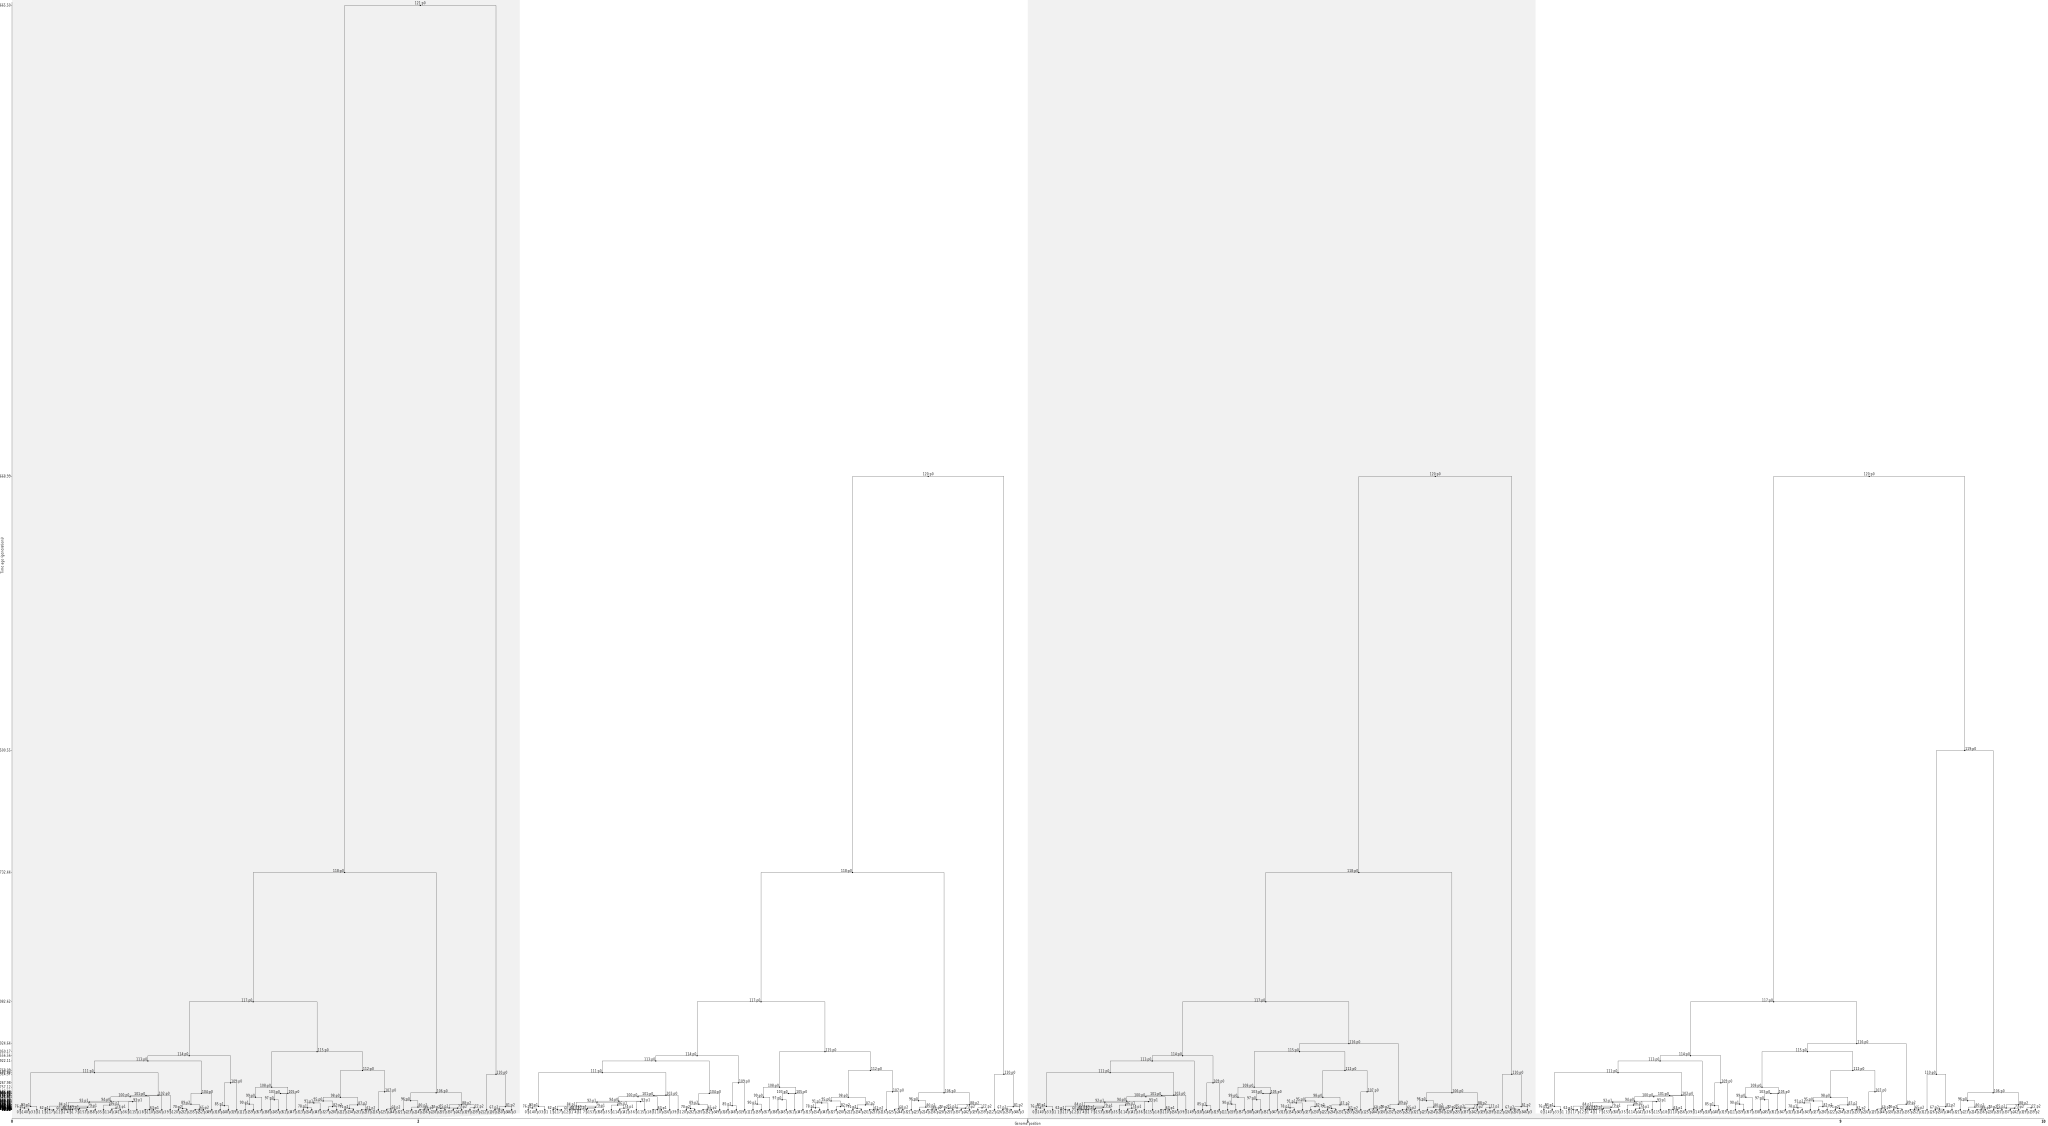

In [543]:
ts.draw_svg(size=size,
            y_axis=True,
            node_labels={node.id: f"{node.id}:{ts.population(node.population).metadata['name']}"
                         for node in ts.nodes()} )

In [505]:
# share of p0 and p1 among nearest neighbours of p1 and p2 members
occur0, occur1 = 0, 0
for tree in ts.trees():
    # print(tree.interval)
    lvs = list(tree.leaves())
    add0, add1 = 0, 0
    for lf in lvs:
        if (tree.population(lf) == 3):
            continue
        siblings = tree.siblings(lf)
        nearest = list([leaf for leaf in tree.leaves(sibling)] for sibling in siblings)[0]
        nearest_pop = [tree.population(nd) for nd in nearest]
        add0 += nearest_pop.count(0) / len(nearest_pop)
        add1 += nearest_pop.count(1) / len(nearest_pop)
        # print(f"{lf}: {nearest}\n {nearest_pop}, {nearest_pop.count(0) / len(nearest_pop)}, {nearest_pop.count(1)/tree.span}") # : {nearest_pop.count(0), nearest_pop.count(1)
    occur0 += add0 * tree.span / len(lvs)
    occur1 += add1 * tree.span/ len(lvs)
print(occur0/ ts.sequence_length, occur1/ ts.sequence_length)

0.45681818181818185 0.3386363636363636


In [506]:
# share of p0 and p1 among nearest neighbours including p3
occur0, occur1 = 0, 0
for tree in ts.trees():
    lvs = list(tree.leaves())
    add0, add1 = 0, 0
    for lf in lvs:
        siblings = tree.siblings(lf)
        nearest = list([leaf for leaf in tree.leaves(sibling)] for sibling in siblings)[0]
        nearest_pop = [tree.population(nd) for nd in nearest]
        add0 += nearest_pop.count(0) / len(nearest_pop)
        add1 += nearest_pop.count(1) / len(nearest_pop)
        # print(f"{lf}: {nearest}\n {nearest_pop}, {nearest_pop.count(0) / len(nearest_pop)}, {nearest_pop.count(1)/tree.span}") # : {nearest_pop.count(0), nearest_pop.count(1)
    occur0 += add0 * tree.span / len(lvs)
    occur1 += add1 * tree.span/ len(lvs)
print(occur0/ ts.sequence_length, occur1/ ts.sequence_length)

0.5477272727272727 0.3386363636363636


In [511]:
def proportions(treeseq, do_skip_p3):
    occur0, occur1 = 0, 0
    for tree in treeseq.trees():
        # print(tree.interval)
        lvs = list(tree.leaves())
        add0, add1 = 0, 0
        for lf in lvs:
            if (do_skip_p3 and tree.population(lf) == 3):
                continue
            siblings = tree.siblings(lf)
            nearest = list([leaf for leaf in tree.leaves(sibling)] for sibling in siblings)[0]
            nearest_pop = [tree.population(nd) for nd in nearest]
            add0 += nearest_pop.count(0) / len(nearest_pop)
            add1 += nearest_pop.count(1) / len(nearest_pop)
            # print(f"{lf}: {nearest}\n {nearest_pop}, {nearest_pop.count(0) / len(nearest_pop)}, {nearest_pop.count(1)/tree.span}") # : {nearest_pop.count(0), nearest_pop.count(1)
        occur0 += add0 * tree.span / len(lvs)
        occur1 += add1 * tree.span/ len(lvs)
    occur0 /= treeseq.sequence_length
    occur1 /= treeseq.sequence_length
    return occur0, occur1

In [518]:
# подбор гиперпараметров существенно не дает разброса
p1_n, p2_n, p3_n = 5, 5, 1
for p1_n in range(3, 52, 4):
    for split_prop in [0.1, 0.2, 0.3, 0.4, 0.5]:
        for initial_proportion in [0.1, 0.2, 0.3, 0.4, 0.5]:
            for divise_p3 in [0.1, 0.2, 0.3, 0.4, 0.5]:
                dem = msprime.Demography()
                dem.add_population(name="p1", initial_size=dem_size * initial_proportion) # *split_proportion
                dem.add_population(name="p2", initial_size=dem_size * (1-initial_proportion)) # (1-split_proportion)
                dem.add_population(name="p0", initial_size=dem_size)
                dem.add_population(name="p3", initial_size=dem_size * divise_p3)
                # dem.debug()
                # print(ts.tables.populations)
                dem.add_admixture(time=T_p3, derived="p3", ancestral=["p1", "p2"], proportions=[split_prop, 1-split_prop])
                dem.add_population_split(time=T_split, derived=["p1", "p2"], ancestral="p0")
                # dem
                ts = msprime.sim_ancestry(
                    samples={"p1": p1_n, "p2": p1_n, "p3": p3_n},
                    demography=dem,
                    sequence_length=10,
                    recombination_rate=0.000001,
                )
                print(f"split={split_prop}, initial={initial_proportion}, divise={divise_p3}: ")
                # share of p0 and p1 among nearest neighbours of p1 and p2 members
                p0, p1 = proportions(ts, True)
                print(f"count for p1, p2: {p0}, {p1}, {p0+p1}")
                p0, p1 = proportions(ts, False)
                print(f"count for p1, p2, p3: {p0}, {p1}, {p0+p1}")
                print(f"magic number? {(p0 * p1_n + p1 * p1_n)/(p1_n+p1_n+p3_n)}")

split=0.1, initial=0.1, divise=0.1: 
count for p1, p2: 0.5904251700680272, 0.23314625850340137, 0.8235714285714286
count for p1, p2, p3: 0.5904251700680272, 0.23314625850340137, 0.8235714285714286
magic number? 0.3529591836734694
split=0.1, initial=0.1, divise=0.2: 
count for p1, p2: 0.49489795918367346, 0.1139455782312925, 0.608843537414966
count for p1, p2, p3: 0.5663265306122449, 0.18537414965986393, 0.7517006802721089
magic number? 0.3221574344023323
split=0.1, initial=0.1, divise=0.3: 
count for p1, p2: 0.35714285714285715, 0.42857142857142855, 0.7857142857142857
count for p1, p2, p3: 0.42857142857142855, 0.5, 0.9285714285714286
magic number? 0.3979591836734694
split=0.1, initial=0.1, divise=0.4: 
count for p1, p2: 0.4767006802721088, 0.2590136054421769, 0.7357142857142858
count for p1, p2, p3: 0.4767006802721088, 0.38401360544217683, 0.8607142857142857
magic number? 0.3688775510204082
split=0.1, initial=0.1, divise=0.5: 
count for p1, p2: 0.42857142857142855, 0.32142857142857145,

~~TODO: посравнивать с отношением размеров выборок~~ upd корреляция ну не особо

А теперь посчитать для p3 те же статистики? Может быть, экземпляров p3 должно быть побольше, чтобы было как-то презентабельнее?

Потому что если семплов p3 мало, то их соседи 99% случаев или только p1, или только p2 

In [623]:
dem_size = 1e5
T_split = 1000
split_proportion=0.1
T_p3 = 15
alpha = 0.3
dem = msprime.Demography()
dem.add_population(name="p1", initial_size=dem_size * 0.5) # *split_proportion
dem.add_population(name="p2", initial_size=dem_size*0.5) # (1-split_proportion)
dem.add_population(name="p0", initial_size=dem_size)
dem.add_population(name="p3", initial_size=dem_size/2)
dem.debug()
# print(ts.tables.populations)
dem.add_admixture(time=T_p3, derived="p3", ancestral=["p1", "p2"], proportions=[split_proportion, 1-split_proportion])
dem.add_population_split(time=T_split, derived=["p1", "p2"], ancestral="p0")

PopulationSplit(time=1000, derived=['p1', 'p2'], ancestral='p0')

In [624]:
ts = msprime.sim_ancestry(
    samples={"p1": 5000, "p2": 5000, "p3": 1000},
    demography=dem,
    sequence_length=10,
    recombination_rate=0.000001,
)

In [625]:
occ1, occ2 = proportions(ts, True)
occ1, occ2

(0.4503506307461772, 0.4238515874929874)

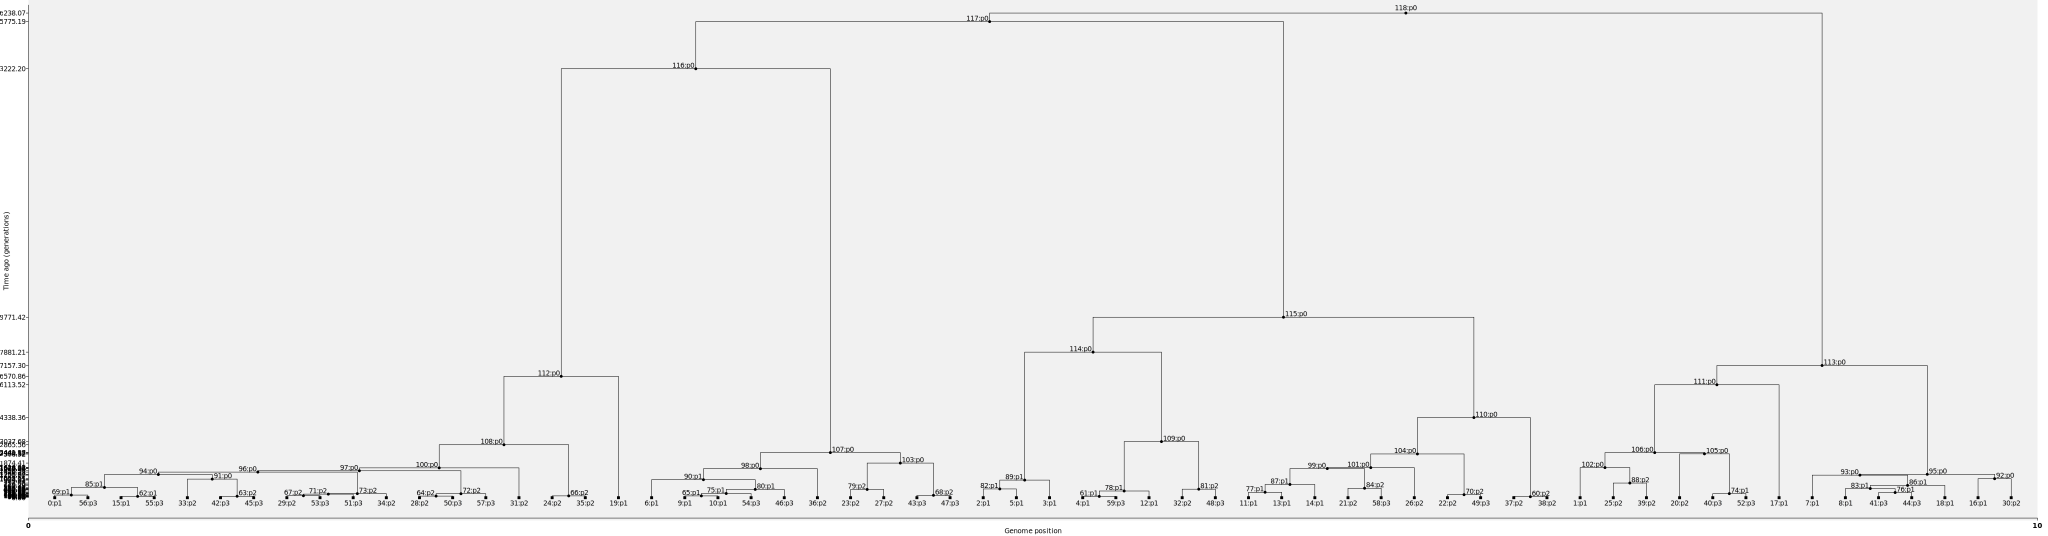

In [571]:
ts.draw_svg(size=(4200, 1100),
            y_axis=True,
            node_labels={node.id: f"{node.id}:{ts.population(node.population).metadata['name']}"
                         for node in ts.nodes()} )

Посчитаем теперь для экземпляра из p3 некое взвешенное кол-во соседей

In [632]:
def weight_neighbours3(treeseq, ndp3):
    occur0, occur1 = 0, 0
    for tree in treeseq.trees():
        siblings = tree.siblings(ndp3)
        nearest = list([leaf for leaf in tree.leaves(sibling)] for sibling in siblings)[0]
        nearest_pop = [tree.population(nd) for nd in nearest]
        occur0 += nearest_pop.count(0) * tree.span / len(nearest_pop)
        occur1 += nearest_pop.count(1) * tree.span / len(nearest_pop)
    occur0 /= treeseq.sequence_length
    occur1 /= treeseq.sequence_length
    return occur0, occur1

In [589]:
# тут чето не то
# def proportions3(treeseq, ndp3):
#     occur0, occur1 = 0, 0
#     for tree in treeseq.trees():
#         siblings = tree.siblings(ndp3)
#         nearest = list([leaf for leaf in tree.leaves(sibling)] for sibling in siblings)[0]
#         print(nearest)
#         nearest_pop = [tree.population(nd) for nd in nearest]
#         occur0 += nearest_pop.count(0) * tree.span / len(nearest_pop)
#         occur1 += nearest_pop.count(1) * tree.span / len(nearest_pop)
        
#          # += add0  # / len(lvs)
#          # += add1 * tree.span #/ len(lvs)
#     occur0 /= treeseq.sequence_length
#     occur1 /= treeseq.sequence_length
#     return occur0, occur1

In [633]:
samples_p3 = set(node for node in ts.samples() if ts.node(node).population == 3)

In [634]:
assert len(samples_p3) == 2000

In [643]:
for s3 in samples_p3:
    print(s3)
    o1, o2 = weight_neighbours3(ts, s3)
    print(o1, o2) # TODO: выдается не та статистика + не взвешенная сумма
    # break

20000
0.0 0.8135593220338981
20001
0.8274760383386581 0.1277955271565495
20002
0.2650602409638555 0.5963855421686748
20003
0.0 0.7611940298507464
20004
0.3324538258575198 0.5356200527704484
20005
0.0 0.8730650154798762
20006
0.0 0.8651911468812876
20007
0.32495867768595044 0.599099173553719
20008
0.0 0.8235294117647058
20009
0.9594594594594594 0.0
20010
0.5333333333333333 0.33333333333333337
20011
0.5042016806722689 0.40756302521008403
20012
0.0 0.8518109790605545
20013
0.2793788142708555 0.6126448952994398
20014
0.0 0.8438581654080032
20015
0.0 0.8791946308724832
20016
0.0 0.8438581654080032
20017
0.0 0.8336713995943204
20018
0.9811320754716981 0.0
20019
0.10975609756097562 0.7073170731707316
20020
0.006024096385542168 0.8493975903614459
20021
0.2793788142708555 0.6126448952994398
20022
0.3324538258575198 0.5356200527704484
20023
0.0 0.8238993710691824
20024
0.6903225806451613 0.2709677419354839
20025
0.0 0.8666666666666669
20026
0.5161290322580644 0.38709677419354843
20027
0.0 0.8768

нагенеривав очень много экземпляров и много раз прокрутив генерацию деревьев, 15 поколений это мало, чтобы оценить сравнением????

А если подняться не до родителя, а до первого встреченного p0?

In [636]:
[pp for pp in ts.populations()]

[Population(id=0, metadata={'description': '', 'name': 'p1'}),
 Population(id=1, metadata={'description': '', 'name': 'p2'}),
 Population(id=2, metadata={'description': '', 'name': 'p0'}),
 Population(id=3, metadata={'description': '', 'name': 'p3'})]

In [641]:
def weight_neighbours3(treeseq, ndp3):
    occur0, occur1 = 0, 0
    for tree in treeseq.trees():
        first_p0 = tree.parent(ndp3)

        while treeseq.node(first_p0).population != 2:
            first_p0 = tree.parent(first_p0)

        nearest = [leaf for leaf in tree.leaves(first_p0)]
        nearest_pop = [tree.population(nd) for nd in nearest]

        occur0 += nearest_pop.count(0) * tree.span / len(nearest_pop)
        occur1 += nearest_pop.count(1) * tree.span / len(nearest_pop)
    occur0 /= treeseq.sequence_length
    occur1 /= treeseq.sequence_length
    return occur0, occur1

In [642]:
for s3 in samples_p3:
    print(s3)
    o1, o2 = weight_neighbours3(ts, s3)
    print(o1, o2, o1 * occ1 + o2 * occ2)
    break

20000
0.0 0.8135593220338981 0.3448284101637863


"p3 попробовать представить как сумма распределений взвешенной по alpha" -??


Как выйти на долю примеси p3??

Посчитать сколько p3 выходит из p2 и сколько из p1 чтобы оценить пропорцию??

